1. Implement the intensity transformation depicted in Fig. 1a on the image shown in Fig. 1b.
In OpenCV, intensity transformation means applying a function s=T(r) to each pixel value of an image.
You can do this in a few ways depending on the transformation type:

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Read gray scale image
img = cv2.imread(r'D:\5th sem\Image proccessing\EN3160-Assignment-1---Intensity-Transformations-and-Neighborhood-Filtering\a1images\emma.jpg', 0)

# Prepare output
output = np.zeros_like(img, dtype=np.float32)

In [ ]:
# for section one - linear transformation with unit gradient
section1 = img < 50
output[section1] = img[section1]

In [7]:
section2= (img >= 50) & (img < 150)
output[section2]= (15.5 * img[section2]) + 50

In [10]:
# for section three - linear transformation with unit gradient
section3 = (img >= 150) & (img < 255)
output[section3]= img[section3]


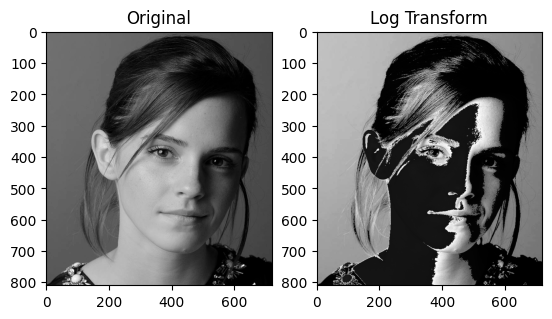

In [ ]:
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(output, cmap='gray'), plt.title('Log Transform')
plt.show()

 2. Apply a similar operation as above (question 1) to accentuate
 (a) white matter
 (b) gray matter

White Matter (WM) appears brighter in T1-weighted MRI (high intensity values).
Gray Matter (GM) appears darker than WM but brighter than CSF (medium intensity values).

We can threshold or remap these intensity ranges to make them stand out.

Binary masks (same size as the image) where:
- 255 = keep this pixel (belongs to WM or GM)
- 0 = discard this pixel (doesn’t belong to that tissue)

In [ ]:
# Read MRI in grayscale
img2 = cv2.imread(r'D:\5th sem\Image proccessing\EN3160-Assignment-1---Intensity-Transformations-and-Neighborhood-Filtering\a1images\brain_proton_density_slice.png', 0)

# Normalize image for consistent scaling to the range 0-255
img_norm = cv2.normalize(img2, None, 0, 255, cv2.NORM_MINMAX)

# White Matter mask (bright intensities, e.g., 180–255)
wm_mask = cv2.inRange(img_norm, 180, 255)

# Gray Matter mask (medium intensities, e.g., 100–179)
gm_mask = cv2.inRange(img_norm, 100, 179)

The mask determines which output pixels are calculated and which are set to zero.
- Only pixels where mask = 255 are taken from (img_norm & img_norm).
- All other positions become black (intensity 0).

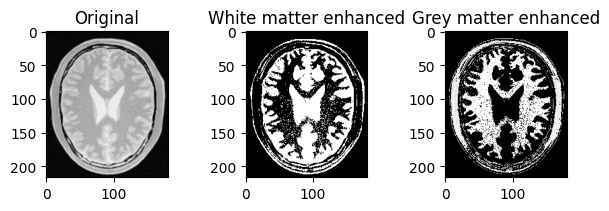

In [ ]:
# Apply masks (accentuate by making them brighter)
wm_highlight = cv2.bitwise_and(img_norm, img_norm, mask=wm_mask)
gm_highlight = cv2.bitwise_and(img_norm, img_norm, mask=gm_mask)

# Optionally enhance contrast
wm_highlight = cv2.convertScaleAbs(wm_highlight, alpha=1.5, beta=0)
gm_highlight = cv2.convertScaleAbs(gm_highlight, alpha=1.5, beta=0)

# Show results
import matplotlib.pyplot as plt

# plotting results

plt.subplot(1, 3, 1)
plt.imshow(img2, cmap='gray')
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(wm_highlight, cmap='gray')
plt.title('White matter enhanced')

plt.subplot(1, 3, 3)
plt.imshow(gm_highlight, cmap='gray')
plt.title('Grey matter enhanced')

plt.tight_layout(pad=3)  # pad controls space between plots
plt.show()


#### Q3 
(a) Apply gamma correction to the L plane in the L∗a∗b∗ color space and state the γ value.
(b) Show the histograms of the original and corrected images.

what is gamma correction? 
Gamma correction is a nonlinear operation used to encode and decode luminance or tristimulus values in images. It adjusts the brightness of an image to better match human perception or display characteristics.

What does it do?
- It changes the brightness of an image by applying a power-law transformation to each pixel’s intensity value.
- Helps to correct the brightness when images are displayed on different devices (monitors, cameras, etc.).
- It can brighten or darken an image depending on the gamma value.

The formula
\[
s = c \cdot r^{\gamma}
\]

Where:

- \( r \) = input pixel intensity normalized between 0 and 1  
- \( s \) = output pixel intensity  
- \( gamma \) = gamma value (a positive real number)  
- \( c \) = constant (usually 1 or 255 if working with 8-bit images)  



#### What is the **L\*a\*b\*** Color Space?

- The **L\*a\*b\*** (CIELAB) color space is designed to be **perceptually uniform** — meaning changes in values correspond more closely to how humans perceive color differences.
- It separates **lightness** from **color** information, which makes it very useful for image processing tasks.

---

#### Explanation of the Channels

| Channel | Description                    | Range                              | Represents                           |
|---------|--------------------------------|----------------------------------|------------------------------------|
| **L**   | **Lightness**                  | 0 (black) to 100 (white) in theory, but OpenCV scales it to 0–255 | How light or dark the pixel is (brightness) |
| **a**   | Green–Red color component      | Typically -128 to 127, scaled to 0–255 in OpenCV                   | Color axis from green (-) to red (+)          |
| **b**   | Blue–Yellow color component     | Typically -128 to 127, scaled to 0–255 in OpenCV                   | Color axis from blue (-) to yellow (+)        |

---

#### Why Apply Gamma Correction **Only** on the **L Channel**?

- **Gamma correction** adjusts the **brightness** or **luminance** of an image.  
- The **L channel** contains the **lightness (brightness)** information separated from color — so it makes sense to apply brightness adjustments there.  
- Applying gamma correction on **a** or **b** channels (which represent color) would distort color hues and make the image look unnatural.  
- By working on the L channel only, you **brighten or darken the image** while preserving the original colors.

---

In [17]:
# Convert your image from BGR (default in OpenCV) to Lab color space

# Read the image
img3 = cv2.imread(r'D:\5th sem\Image proccessing\EN3160-Assignment-1---Intensity-Transformations-and-Neighborhood-Filtering\a1images\highlights_and_shadows.jpg')

# Convert BGR to Lab
lab_img = cv2.cvtColor(img3, cv2.COLOR_BGR2LAB)

In [ ]:
# Split the Lab image into L, a, b channels
L, a, b = cv2.split(lab_img)

#Normalize only L channel to [0,1] for gamma correction
L_norm = L / 255.0

In [29]:
# choose the gamma value = 2.2
gamma = 2.2
L_gamma = np.power(L_norm, gamma)

L_corrected = np.uint8(L_gamma * 255)
lab_corrected = cv2.merge((L_corrected, a, b)) #merge
result = cv2.cvtColor(lab_corrected, cv2.COLOR_LAB2BGR)

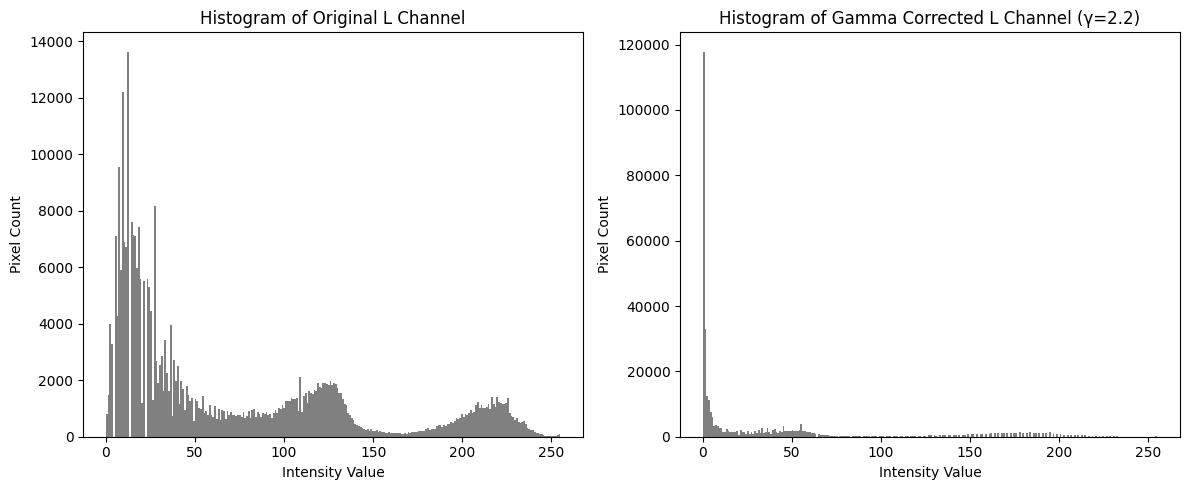

In [30]:
# plot the results

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(L.ravel(), bins=256, range=[0,255], color='gray')
plt.title('Histogram of Original L Channel')
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')

plt.subplot(1,2,2)
plt.hist(L_corrected.ravel(), bins=256, range=[0,255], color='gray')
plt.title('Histogram of Gamma Corrected L Channel (γ=2.2)')
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')

plt.tight_layout()
plt.show()


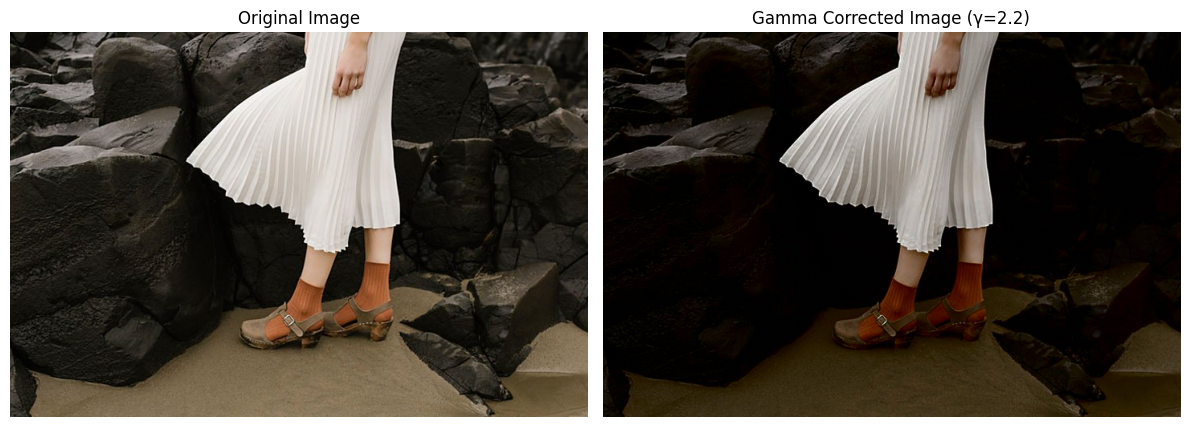

In [32]:
# Convert BGR to RGB for displaying correctly in matplotlib
img_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(img_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')  # Hide axis ticks

axes[1].imshow(result_rgb)
axes[1].set_title(f'Gamma Corrected Image (γ={gamma})')
axes[1].axis('off')

plt.tight_layout()
plt.show()


#### Q4

In [34]:
# Read the image in BGR format (default for OpenCV)
img4 = cv2.imread(r'D:\5th sem\Image proccessing\EN3160-Assignment-1---Intensity-Transformations-and-Neighborhood-Filtering\a1images\spider.png')

# Convert the image from BGR to HSV color space
hsv_img = cv2.cvtColor(img4, cv2.COLOR_BGR2HSV)

# Split the HSV image into individual channels
h, s, v = cv2.split(hsv_img)

# Now, h, s, and v are the Hue, Saturation, and Value planes respectively


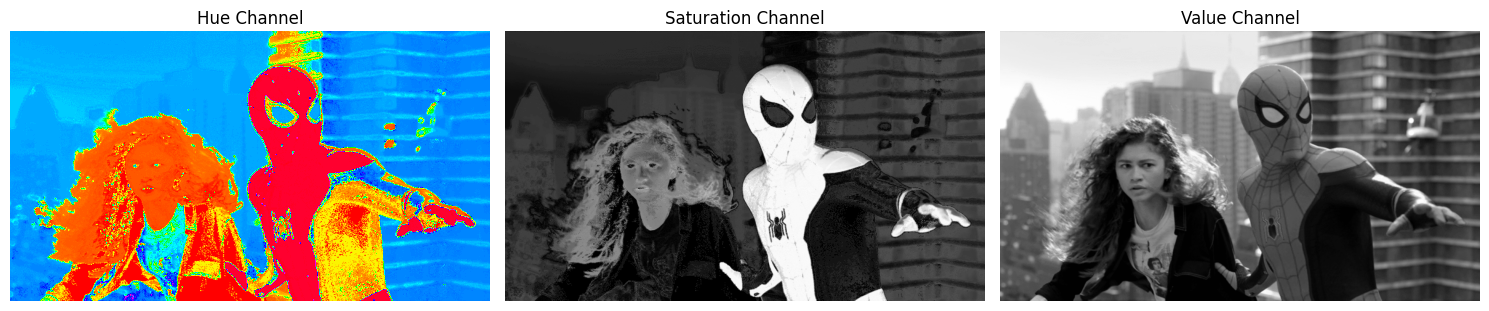

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(h, cmap='hsv')  # Hue channel, using HSV colormap for better color display
axes[0].set_title('Hue Channel')
axes[0].axis('off')

axes[1].imshow(s, cmap='gray')  # Saturation channel in grayscale
axes[1].set_title('Saturation Channel')
axes[1].axis('off')

axes[2].imshow(v, cmap='gray')  # Value channel in grayscale
axes[2].set_title('Value Channel')
axes[2].axis('off')

plt.tight_layout()
plt.show()

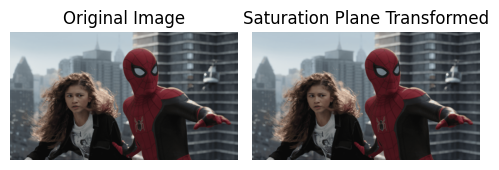

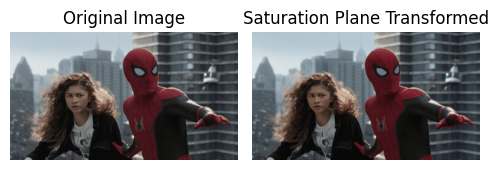

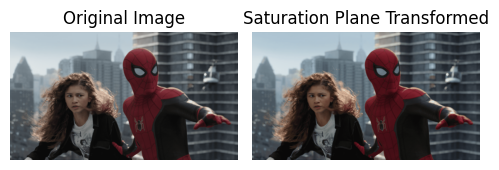

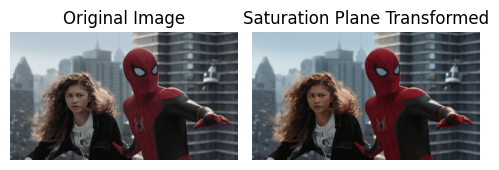

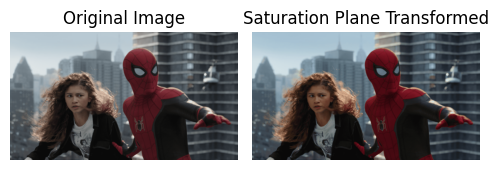

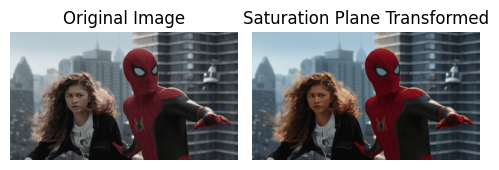

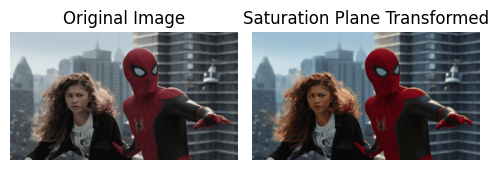

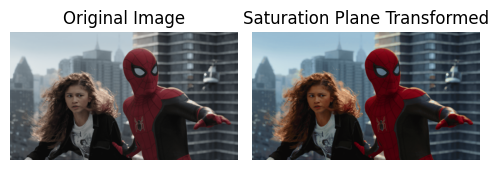

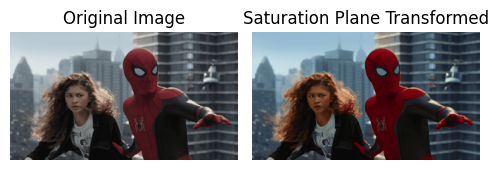

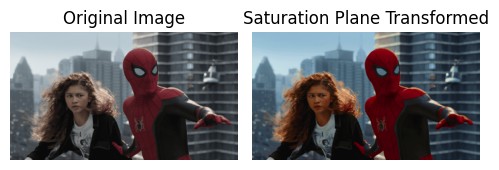

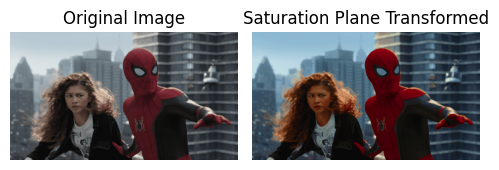

In [ ]:
# Parameters
a = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]     
sigma = 70.0   


for i in a:
    # Calculate the Gaussian term
    gaussian_term = i * 128 * np.exp(-((s.astype(np.float32) - 128) ** 2) / (2 * (sigma ** 2)))

    # Apply the function f(x) = min(x + gaussian_term, 255)
    s_transformed = s.astype(np.float32) + gaussian_term
    s_transformed = np.clip(s_transformed, 0, 255).astype(np.uint8) # converts the saturation channel from integer to float for precise calculations.

    # Recombine three channels
    hsv_transformed = cv2.merge([h, s_transformed, v])

    # Convert back to BGR to display
    result = cv2.cvtColor(hsv_transformed, cv2.COLOR_HSV2BGR)

    # Show original and transformed images side by side
    fig, axes = plt.subplots(1, 2, figsize=(5, 3))
    axes[0].imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Saturation Plane Transformed')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()




In [43]:

def histogram_equalization(image):
    # Flatten image array and calculate histogram
    hist, bins = np.histogram(image.flatten(), 256, [0,256])
    
    # Calculate the cumulative distribution function (CDF)
    cdf = hist.cumsum()
    
    # Mask all zero values (to avoid division by zero)
    cdf_masked = np.ma.masked_equal(cdf, 0)
    
    # Normalize the CDF
    cdf_min = cdf_masked.min()
    cdf_max = cdf_masked.max()
    cdf_norm = (cdf_masked - cdf_min) * 255 / (cdf_max - cdf_min)
    
    # Fill masked values with zero
    cdf_final = np.ma.filled(cdf_norm, 0).astype('uint8')
    
    # Map the original image pixels to equalized values using the normalized CDF as a lookup table
    img_equalized = cdf_final[image]
    
    return img_equalized

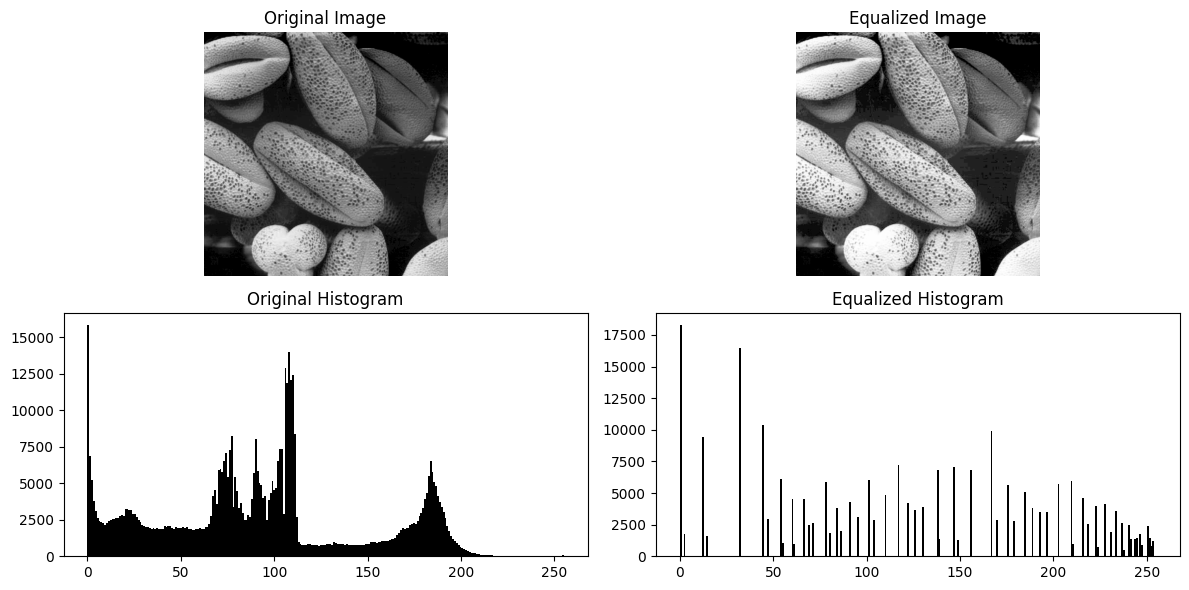

In [46]:
img5 = cv2.imread(r'D:\5th sem\Image proccessing\EN3160-Assignment-1---Intensity-Transformations-and-Neighborhood-Filtering\a1images\shells.tif', 0)

# Apply custom histogram equalization
equalized_img = histogram_equalization(img5)

# Display results
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(img5, cmap='gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.title('Equalized Image')
plt.imshow(equalized_img, cmap='gray')
plt.axis('off')

plt.subplot(2,2,3)
plt.title('Original Histogram')
plt.hist(img.flatten(), bins=256, range=[0,255], color='black')

plt.subplot(2,2,4)
plt.title('Equalized Histogram')
plt.hist(equalized_img.flatten(), bins=256, range=[0,255], color='black')

plt.tight_layout()
plt.show()